In [1]:
import xarray as xr
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import os 
import cartopy.feature as cf
import cartopy.crs as ccrs
import matplotlib.dates as dates
import datetime 
import sys

from split_filename import *
from GOLD import *
import warnings

warnings.filterwarnings("ignore",category = RuntimeWarning)

    


In [25]:
def sep_hemispheres(ds, parameter = 'n2_lbh_unc_ran'):
    
    """
    returns
    -------
        like dataframe with informations of south and north
    """

    south = ds.isel(nscans = np.arange(1, len(ds.nscans.values), 2))

    df_south = south[parameter].mean(dim = ['nlats', 'nlons']).to_dataframe()
    
    north = ds.isel(nscans = np.arange(0, len(ds.nscans.values), 2))
    
    df_north = north[parameter].mean(dim = ['nlats', 'nlons']).to_dataframe()

    return df_north, df_south

def plotting_hemispheres(ax, ds, parameter = 'radiance_oi_1356'):
    
    north, south = sep_hemispheres(ds, parameter = parameter)
    
    north.plot(ax = ax, color = 'red', lw = 2, legend = False)
    south.plot(ax = ax, color = 'black', lw = 2, legend = False)

    args_names = ds[parameter].attrs
    title = args_names['FIELDNAM']
    xlabel = 'Time UTC'
    ylabel = args_names['LABLAXIS']

    ax.set(xlabel = xlabel, ylabel = ylabel)

    ax.xaxis.set_major_formatter(dates.DateFormatter('%H:%M'))
    ax.xaxis.set_major_locator(dates.HourLocator(interval = 2))

def window(data, step = 4):
    
    mrows, mcols = data.shape

    for i in range(mrows - step):
        for j in range(mcols - step):
            
            values = data[i:i+step, j:j+step]
            values[~np.isnan(values)] = np.nanmean(values)
            data[i:i+step, j:j+step] = values
            
    return data

infile = 'C:\\Users\\Luiz Felipe\\Downloads\\ON22019111120191112\\tmp\\archive_L2\\2019\\315\\'
filename = 'GOLD_L2_ON2_2019_315_v02_r01_c01.nc'

ds = xr.open_dataset(infile + filename) 

ds.coords['nscans'] = bytes_string(ds['scan_start_time'])

ds.isel(nscans= [40, 41])

<xarray.Dataset>
Dimensions:             (nlats: 104, nlons: 92, nmask: 4001, nscans: 2)
Coordinates:
  * nscans              (nscans) object 2019-11-11T16:10:31+00:00 2019-11-11T16:22:27+00:00
Dimensions without coordinates: nlats, nlons, nmask
Data variables:
    mask_oi_1356        (nmask) int32 ...
    n2_lbh_unc_ran      (nscans, nlats, nlons) float32 ...
    lookup_table        (nscans) |S50 ...
    mask_wavelength     (nmask) float32 ...
    radiance_oi_1356    (nscans, nlats, nlons) float32 ...
    channel             (nscans) |S50 ...
    latitude            (nlats, nlons) float32 ...
    on2                 (nscans, nlats, nlons) float32 ...
    oi_1356_unc_ran     (nscans, nlats, nlons) float32 ...
    on2_unc_ran         (nscans, nlats, nlons) float32 ...
    dqi                 (nscans) int32 ...
    scan_start_time     (nscans) |S50 b'2019-11-11T16:10:31Z' b'2019-11-11T16:22:27Z'
    solar_zenith_angle  (nscans, nlats, nlons) float32 ...
    longitude           (nlats, nlons) float32 ...
    on2_dqi             (nscans, nlats, nlons) int32 ...
    on2_unc_sys         (nscans, nlats, nlons) float32 ...
    on2_unc_mod         (nscans, nlats, nlons) float32 ...
    n2_lbh_unc_sys      (nscans, nlats, nlons) float32 ...
    time_utc            (nscans, nlats, nlons) |S50 ...
    mask_n2_lbh         (nmask) int32 ...
    input_l1c_file      (nscans) |S50 ...
    radiance_n2_lbh     (nscans, nlats, nlons) float32 ...
    emission_angle      (nscans, nlats, nlons) float32 ...
    scan_stop_time      (nscans) |S50 ...
    oi_1356_unc_sys     (nscans, nlats, nlons) float32 ...
    hemisphere          (nscans) |S50 ...
Attributes:
    Data_revision:               01
    Logical_source:              GOLD_L2_ON2
    PI_name:                     Richard Eastes
    TEXT:                        The GOLD mission of opportunity flies an ult...
    Mission_group:               GOLD
    Data_version:                02
    Data_type:                   APIDx? > GOLD Application ID 0x?: Level 2 Da...
    Generation_date:             20191111
    date_start:                  2019-11-11T06:10:34Z
    dqi:                         0
    Instrument_type:             UV Imaging Spectrograph (Space)
    PI_affiliation:              University of Colorado/LASP
    Source_name:                 GOLD>Global-scale Observations of the Limb a...
    Data_cycle:                  01
    Acknowledgement:             This is a data product from the NASA Global-...
    Logical_source_description:  GOLD ON2 L2 Daily File
    Discipline:                  Space Physics > Ionospheric Science
    Logical_file_id:             GOLD_L2_ON2_2019_315_v02_r01_c01
    date_end:                    2019-11-11T23:03:46Z
    Descriptor:                  ON2>Column density ratio of atomic oxygen to...
    Project:                     NASA > GOLD
    Software_version:            dafdbd1

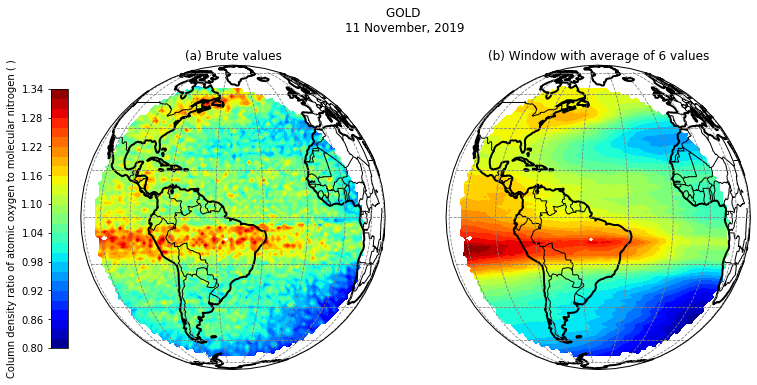

In [18]:


n = ds.isel(nscans = 40)
s = ds.isel(nscans = 41)

ds = n.combine_first(s)

fig = plt.figure(figsize= (12, 6))

ax = fig.add_subplot(1, 2, 1, projection = ccrs.Orthographic(central_longitude= - 47.5))


ax.set(title = "(a) Brute values")

parameter = 'on2'

name = ds[parameter].attrs['CATDESC']
units = ds[parameter].attrs['UNITS']

features_of_map(ax)

img = ax.contourf(lons, lats, ds[parameter].values, 30, cmap = 'jet', 
                transform = ccrs.PlateCarree())

ax = fig.add_subplot(1, 2, 2, projection = ccrs.Orthographic(central_longitude= - 47.5))

ax.set(title = "(b) Window with average of 6 values")

features_of_map(ax)

img = ax.contourf(lons, lats, window(ds[parameter].values, step = 6), 30, cmap = 'jet', 
                transform = ccrs.PlateCarree())
    
cbar_ax = fig.add_axes([.09, 0.2, 0.02, 0.6])

cs = fig.colorbar(img, cax=cbar_ax, ticklocation='left')

cs.set_label(f"{name} ({units})")

fig.suptitle('GOLD \n' + split_filename(filename).date(), y = .99)

plt.rcParams.update({'font.size': 12})  

plt.show()

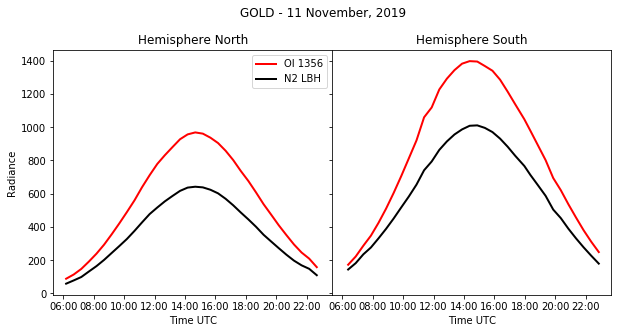

In [10]:
fig, ax = plt.subplots(figsize = (10, 5), ncols = 2, sharey = True, sharex = True)
plt.subplots_adjust(wspace = 0)

n1356, s1356 = sep_hemispheres(ds, parameter = 'radiance_oi_1356')
nLBH, sLBH = sep_hemispheres(ds, parameter = 'radiance_n2_lbh')

#North hemisphere
n1356.plot(ax = ax[0], color = 'red', lw = 2)
nLBH.plot(ax = ax[0], color = 'black', lw = 2)

ax[0].set(title = 'Hemisphere North', xlabel = 'Time UTC', ylabel = 'Radiance')

ax[0].legend(['OI 1356', 'N2 LBH'])

#South
s1356.plot(ax = ax[1], color = 'red', lw = 2, legend = False)
sLBH.plot(ax = ax[1], color = 'black', lw = 2, legend = False)

ax[0].xaxis.set_major_formatter(dates.DateFormatter('%H:%M'))
ax[0].xaxis.set_major_locator(dates.HourLocator(interval = 2))


ax[1].set(title = 'Hemisphere South', xlabel = 'Time UTC')

title_date = split_filename(filename)
date_str = str(title_date.date(extent = False)).replace('-', '_')

fig.suptitle('GOLD - ' + title_date.date(), y = 1.)

fig.autofmt_xdate(rotation=0, ha = 'center')
plt.show()

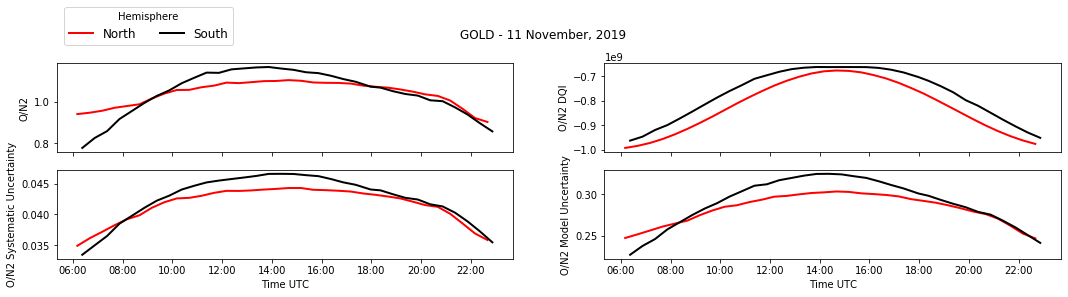

In [85]:
list_1356 = ['radiance_oi_1356', 'oi_1356_unc_ran', 'oi_1356_unc_sys']
list_lbh = ['radiance_n2_lbh', 'n2_lbh_unc_ran', 'n2_lbh_unc_sys']

ratio_list = ['on2', 'on2_dqi', 'on2_unc_sys', 'on2_unc_mod']


fig, axes = plt.subplots(figsize = (18, 4), ncols = 2, nrows = 2)

for ax, col in zip(axes.flat, ratio_list):
    
    plotting_hemispheres(ax, ds, parameter = col)

fig.autofmt_xdate(rotation=0, ha = 'center')

if len(axes) == 2:
    bbox = (-0.9, 2.8, 0.1, .1)
else:
    bbox = (-0.01, 2.8, 0.1, .1)
    
ax.legend(['North', 'South'], title = 'Hemisphere',  ncol = 2, fontsize = 'large',
          bbox_to_anchor=bbox) #xpoisition, yposition, width, height

title_date = split_filename(filename)
fig.suptitle('GOLD - ' + title_date.date(), y = 1.)

plt.show()



In [30]:
def average_hourly(ds, 
                   parameter = 'radiance_oi_1356', 
                   step = 2, 
                   log10 = False):
    
    """
    The cadence of measures it is average 15 minutes. So, this 
    function returns the average for each one hour in each hemisphere.
    
    Parameters
    ---------
        Hemisphere: 1 for south and 0 for north values
    
    """
    ratio_list = ['on2', 'on2_dqi', 'on2_unc_sys', 'on2_unc_mod']
    
    north = []
    south = []
    
    hour_list = []
    
    for hemisphere in range(2):
        s = ds.isel(nscans = np.arange(hemisphere, 68, 2))

        scans_values = s['nscans'].values
        
        time_list = [[scans_values[i], scans_values[i + 1]] for i in range(len(scans_values) - 1)]
        
        for item in time_list[::2]:

            data = s.sel(nscans = item)[parameter].mean(dim = 'nscans', skipna = True).values
            
            if log10:
                data = np.log10(data)
                data[data < 0] = np.nan
            
            if hemisphere == 0:
                north.append(data)
            else:
                south.append(data)

            hour_list.append(item[0].hour)
        
    return list(zip(north, south))[::step], hour_list[::step]



'degrees'

# Plotting

C:\Users\Luiz Felipe\anaconda3\lib\site-packages\ipykernel_launcher.py:29: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


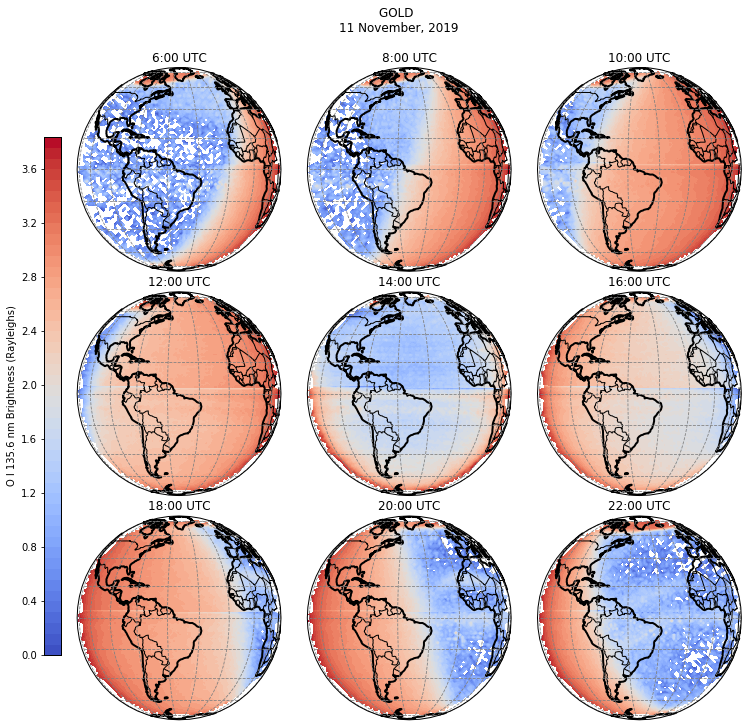

In [37]:
fig, ax = plt.subplots(figsize = (12, 12), nrows = 3, ncols = 3, 
                       subplot_kw={'projection': ccrs.Orthographic(central_longitude= - 47.5)})

    
plt.subplots_adjust(wspace = 0.1, hspace = 0.1)

parameter = 'radiance_oi_1356'

data_list, hour_list = average_hourly(ds, parameter = parameter, log10 = True)


lats = ds['latitude'].values
lons = ds['longitude'].values

name = ds[parameter].attrs['FIELDNAM']
units = ds[parameter].attrs['UNITS']

for ax, hour, data in zip(ax.flat, hour_list, data_list):
    
    features_of_map(ax)
    
    ax.set(title = f'{hour}:00 UTC')
    
    for n in data:
        
        img = ax.contourf(lons, lats, n, 50, cmap = 'coolwarm',
                          transform = ccrs.PlateCarree())
    
        cbar_ax = fig.add_axes([.09, 0.2, 0.02, 0.6])

        cs = fig.colorbar(img, cax=cbar_ax, ticklocation='left')

        cs.set_label(f"{name} ({units})")
        

title_date = split_filename(filename).date()
        
fig.suptitle('GOLD \n' + title_date, y = .95)

plt.show()

In [20]:
def figure_name(files, emission):
    
    emission = emission.replace(' ', '_')
    
    if isinstance(files, list):
        
        if len(files) == 2:
            first, second = files[0], files[1]
        else:
            first, second = files[0], files[-1]
            
        start = split_filename(first)
        end = split_filename(second)
        time_start, time_end = start.time().replace(':',''), end.time().replace(':','')
        date = str(start.date(extent = False)).replace('-', '_')
        
        return f"GOLD_{start.product}_{emission}_{date}_{time_start}_{time_end}"
    else:
        start = split_filename(filename)
        if start.level == 'L2':
             return f"GOLD_{emission.upper()}_{start.level}_{str(start.date(extent = False)).replace('-', '_')}"
        

FigureName = figure_name(filename, parameter + '_window')

FigureName


'GOLD_ON2_WINDOW_L2_2019_11_11'

In [21]:
PathOut = 'C:\\Users\\Luiz Felipe\\Google Drive\\Doutorado\\Modelos_Latex_INPE\\Figuras1\\'

fig.savefig(PathOut + FigureName + '.png', dpi = 100, quality = 95, bbox_inches="tight")
